In [20]:
# Netflix Data: Cleaning, Analysis and Visualization

In [21]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
sns.set(style="whitegrid")
%matplotlib inline

In [22]:
# Step 2: Load Dataset
df = pd.read_csv("/content/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [23]:
# Step 3: Data Cleaning
df.info()
# Drop the 'genre_list' column as it contains lists and causes error in drop_duplicates
if 'genre_list' in df.columns:
    df = df.drop('genre_list', axis=1)
df.drop_duplicates(inplace=True)
df.loc[:, 'country'] = df['country'].fillna("Not Given")
df.loc[:, 'director'] = df['director'].fillna("Not Given")
df.loc[:, 'cast'] = df['cast'].fillna("Not Given")
df.dropna(subset=['date_added'], inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,object


/tmp/ipython-input-24-2638284023.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


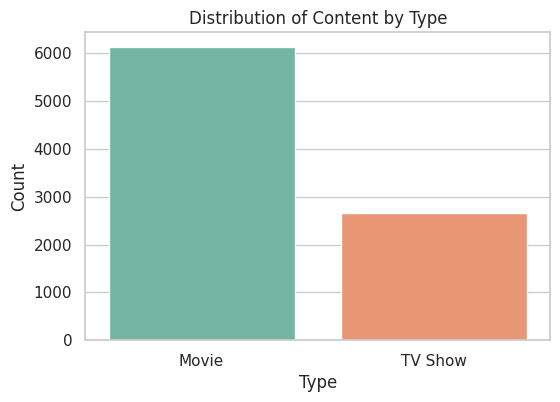

In [24]:
# Step 4.1: Content Type Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Distribution of Content by Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-25-1712079373.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index[:10], palette='cool')


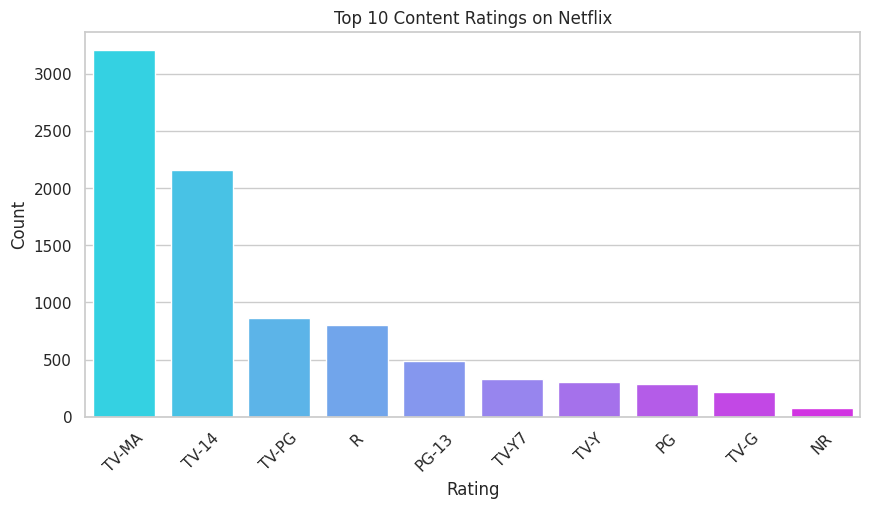

In [25]:
# Step 4.2: Rating Distribution
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index[:10], palette='cool')
plt.xticks(rotation=45)
plt.title("Top 10 Content Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-26-77233302.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year_added', palette='mako')


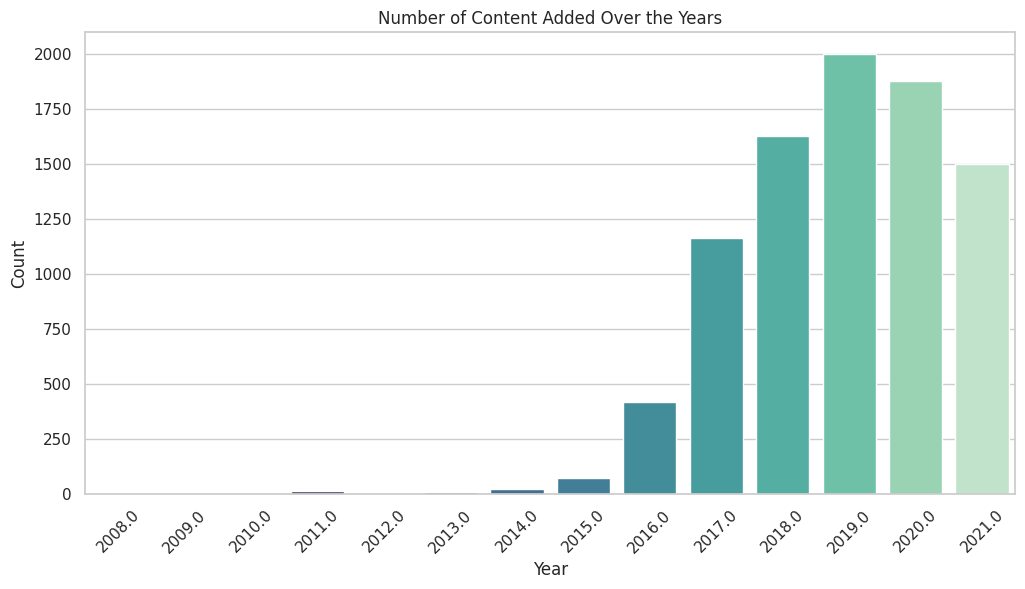

In [26]:
# Step 4.3: Content Over the Years
df['year_added'] = df['date_added'].dt.year
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='year_added', palette='mako')
plt.xticks(rotation=45)
plt.title("Number of Content Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-27-1427061615.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


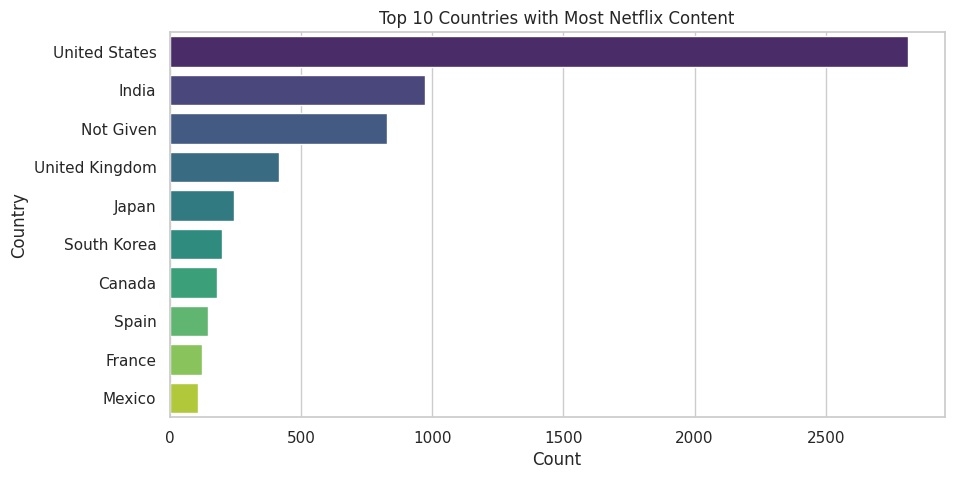

In [27]:
# Step 4.4: Top 10 Countries
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

/tmp/ipython-input-28-2550436190.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')


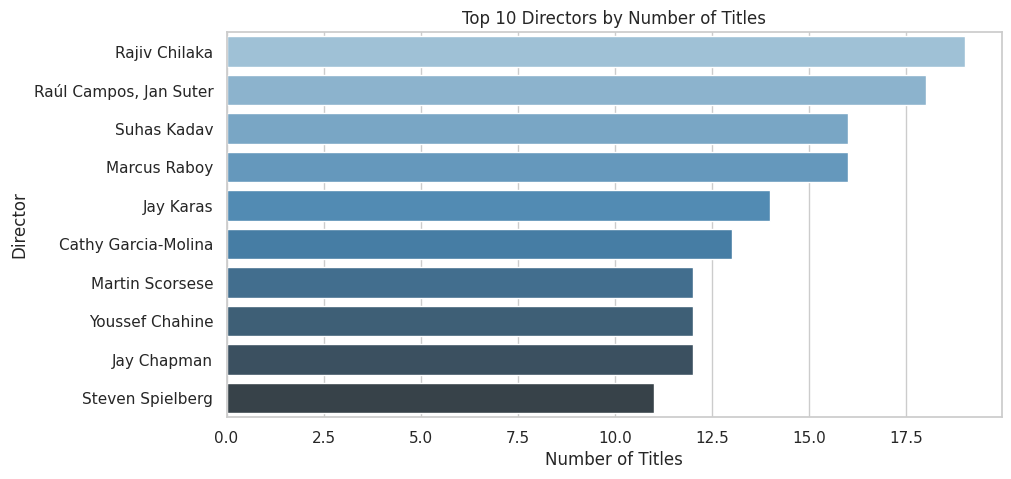

In [28]:
# Step 4.5: Top Directors
top_directors = df[df['director'] != 'Not Given']['director'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')
plt.title("Top 10 Directors by Number of Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

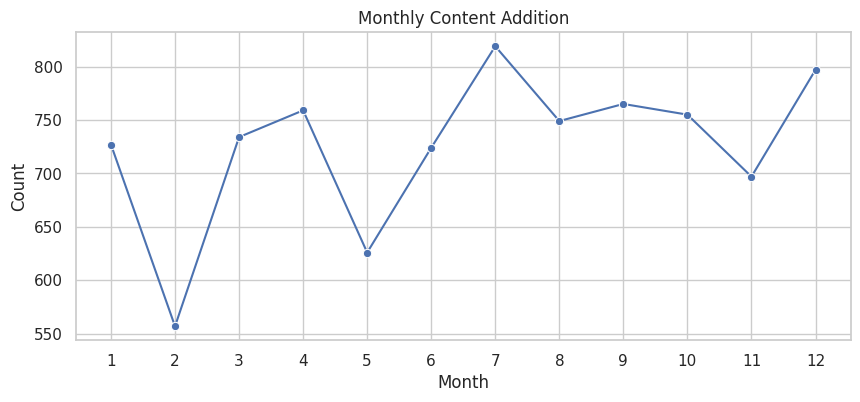

In [29]:
# Step 4.6: Monthly and Yearly Releases
df['month'] = df['date_added'].dt.month
monthly_content = df['month'].value_counts().sort_index()
plt.figure(figsize=(10,4))
sns.lineplot(x=monthly_content.index, y=monthly_content.values, marker='o')
plt.title("Monthly Content Addition")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

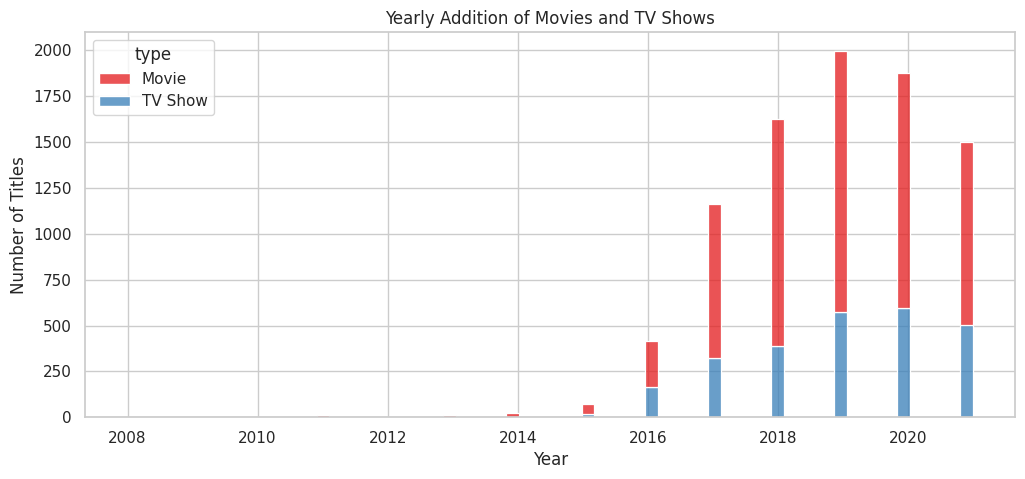

In [30]:
# Yearly Releases
plt.figure(figsize=(12,5))
sns.histplot(data=df, x='year_added', hue='type', multiple='stack', palette='Set1')
plt.title("Yearly Addition of Movies and TV Shows")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

/tmp/ipython-input-31-3043935520.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='Set3')


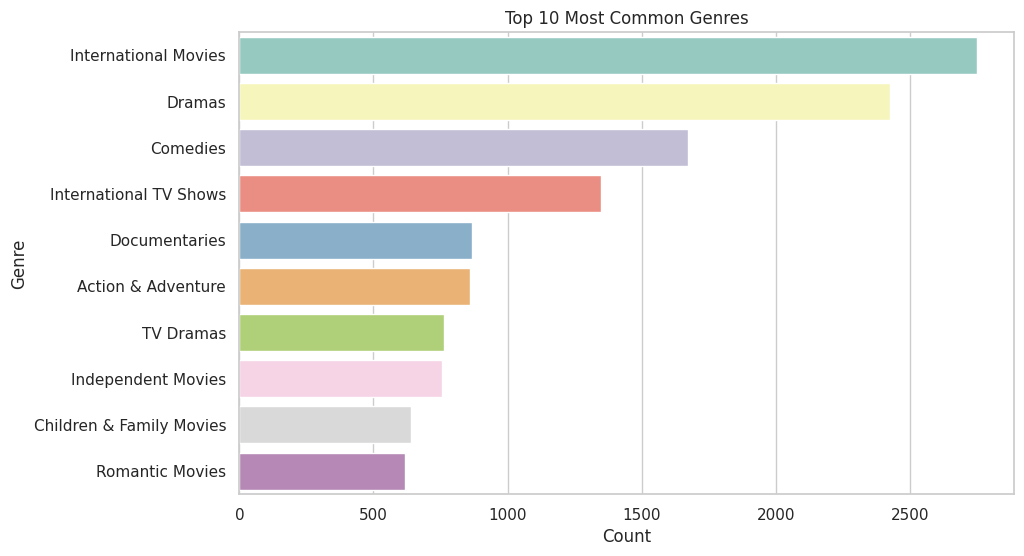

In [31]:
# Step 4.7: Genre Analysis
df['genre_list'] = df['listed_in'].apply(lambda x: [i.strip() for i in x.split(',')])
from collections import Counter
genre_counts = Counter([genre for sublist in df['genre_list'] for genre in sublist])
top_genres = pd.Series(genre_counts).sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='Set3')
plt.title("Top 10 Most Common Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

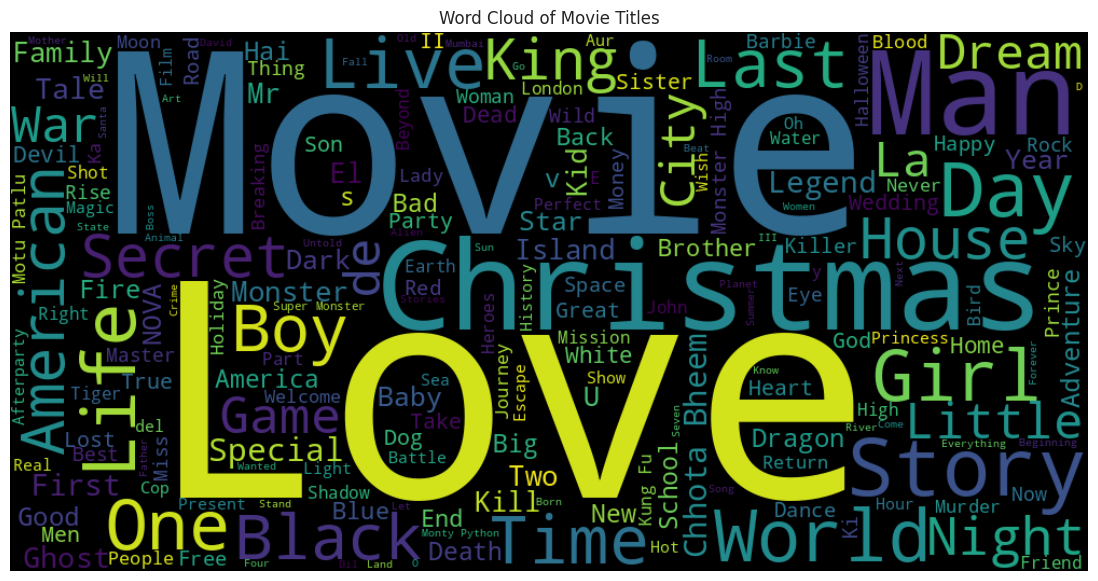

In [32]:
# Step 4.8: Word Cloud
movie_titles = df[df['type']=='Movie']['title']
title_cloud = WordCloud(width=1000, height=500, background_color='black').generate(' '.join(movie_titles))
plt.figure(figsize=(15, 7))
plt.imshow(title_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Movie Titles")
plt.show()